<h1>VIT Smartbridge AI/ML Assignment 4</h1>
<p>Soma Anirudh 21BCE5537 VIT Chennai</p>
<hr>

<h2>Grapes to Greatness: Machine Learning in Wine Quality Prediction</h2>
<hr>

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from glob import glob
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [105]:
sns.set_theme()

Importing and loading the dataset

In [106]:
df=pd.read_csv("winequality-red.csv")

In [107]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.shape

(1599, 12)

In [108]:
def wrangle(data):
    features=data.columns.tolist()
    #Checking for null values in each column and dropping the column if it has >50% null values
    for d in features:
        nulls=(data[d].isnull().sum()/len(data))
        if(nulls>0.5):
            data.drop(columns=[d],inplace=True)
    return df

In [109]:
wrangle(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [110]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Univariate Analysis

C:\Users\urwit\AppData\Local\Temp\ipykernel_5084\1704967681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["alcohol"]);


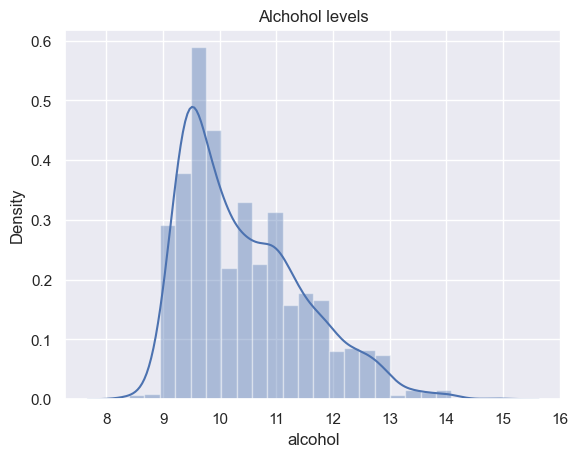

In [111]:
sns.distplot(df["alcohol"]);
plt.title("Alchohol levels");

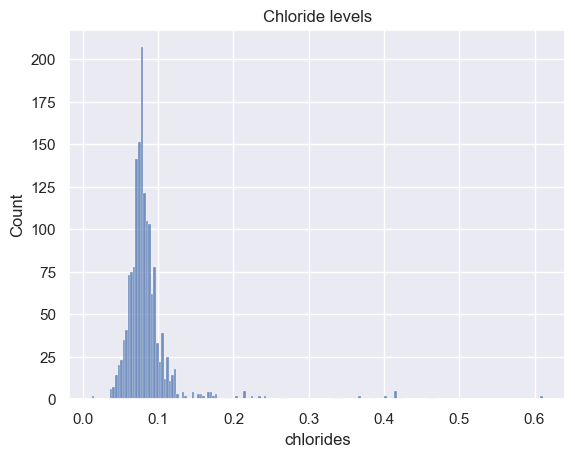

In [42]:
sns.histplot(df["chlorides"]);
plt.title("Chloride levels");

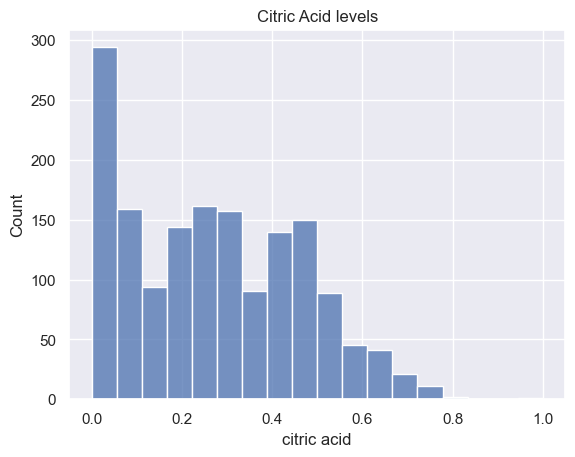

In [43]:
sns.histplot(df["citric acid"]);
plt.title("Citric Acid levels");

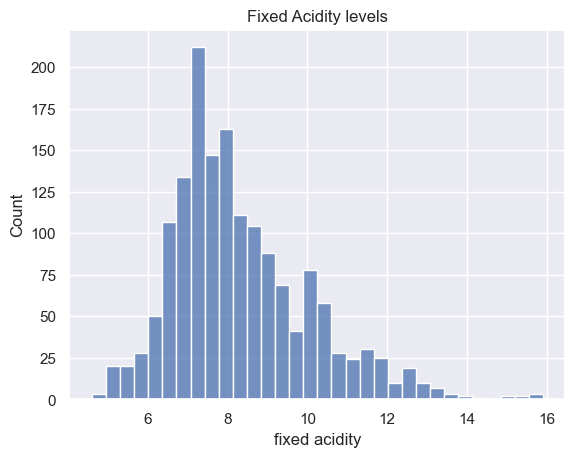

In [44]:
sns.histplot(df["fixed acidity"]);
plt.title("Fixed Acidity levels");

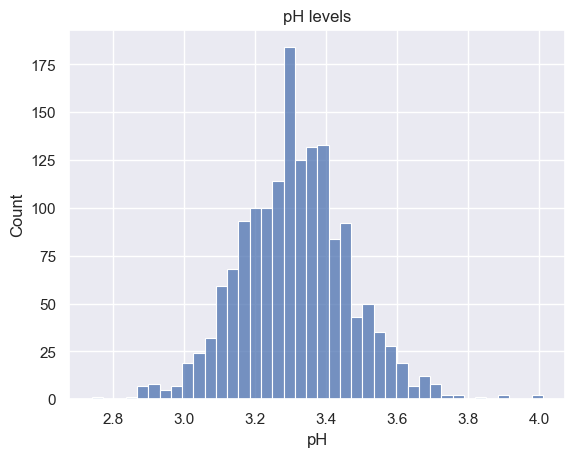

In [45]:
sns.histplot(df["pH"]);
plt.title("pH levels");

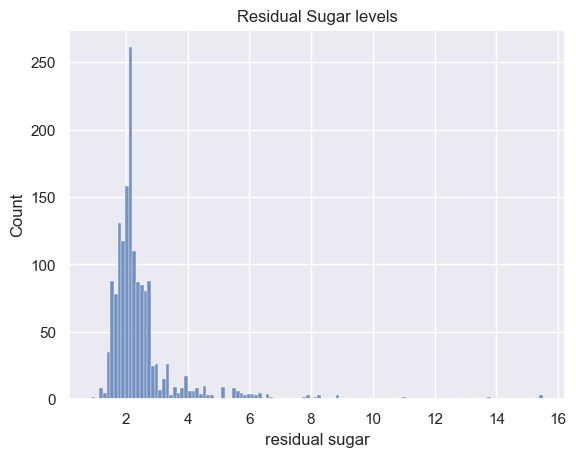

In [46]:
sns.histplot(df["residual sugar"]);
plt.title("Residual Sugar levels");

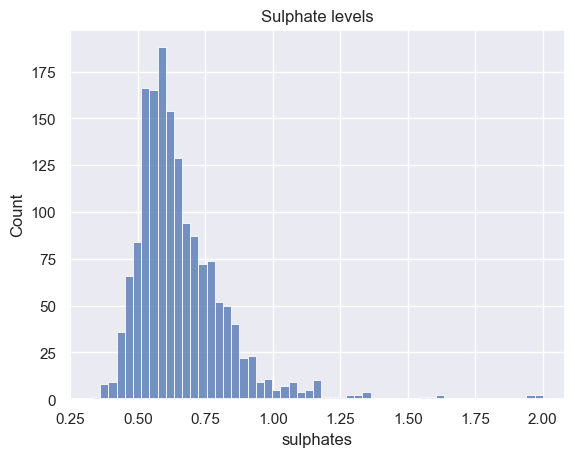

In [47]:
sns.histplot(df["sulphates"]);
plt.title("Sulphate levels");

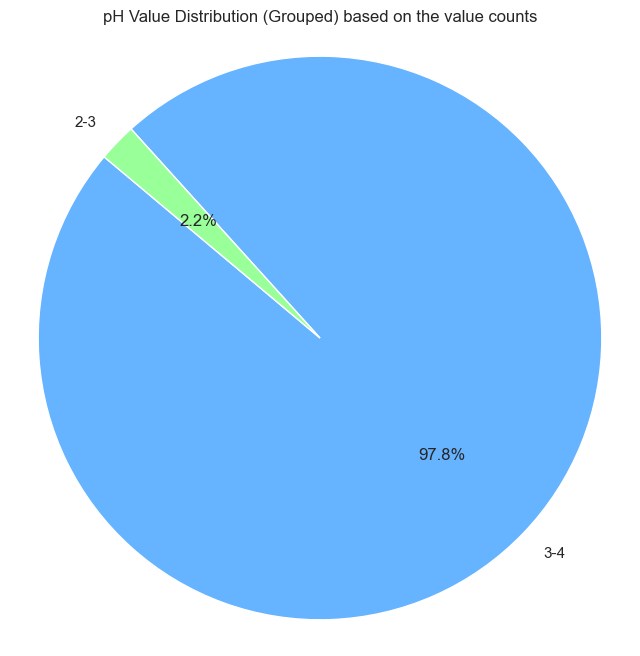

In [112]:
df['pH_category'] = pd.cut(df['pH'], bins=[2, 3, 4], labels=['2-3', '3-4'], include_lowest=True)
pH_category_counts = df['pH_category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(pH_category_counts, labels=pH_category_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99'])
plt.title('pH Value Distribution (Grouped) based on the value counts')
plt.axis('equal')
plt.show()
df = df.drop(columns=['pH_category'])


Bivariate Analysis

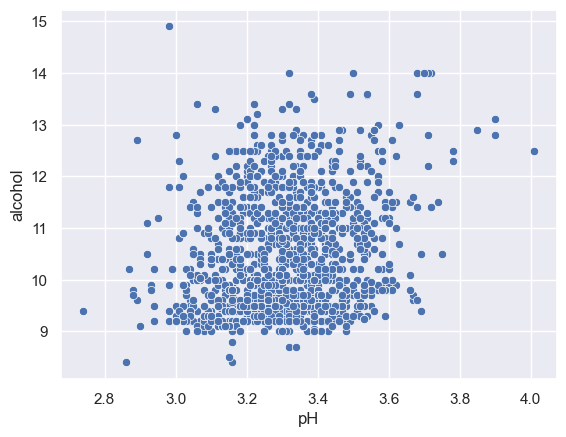

In [113]:
sns.scatterplot(x='pH', y='alcohol', data=df)
plt.show()

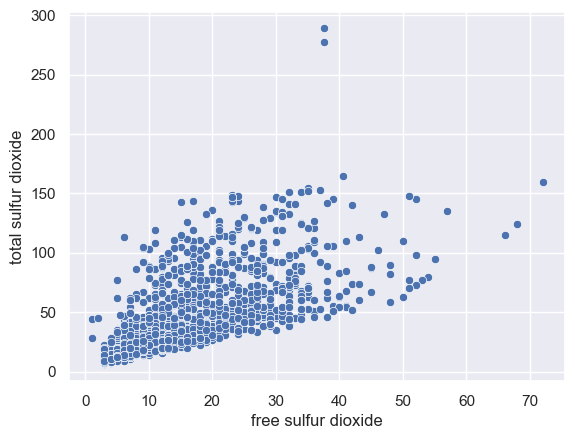

In [70]:
sns.scatterplot(x=df["free sulfur dioxide"], y=df["total sulfur dioxide"])
plt.show()

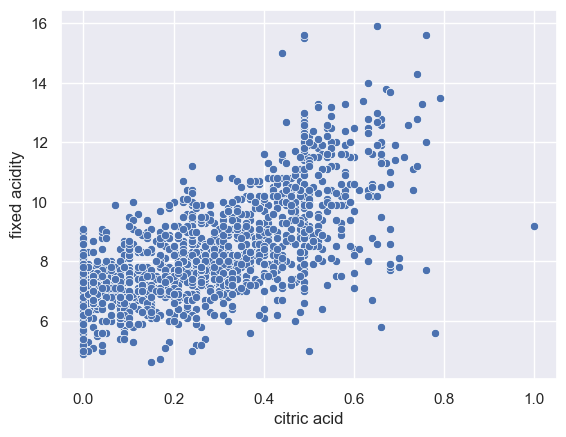

In [71]:
sns.scatterplot(x=df["citric acid"], y=df["fixed acidity"])
plt.show()

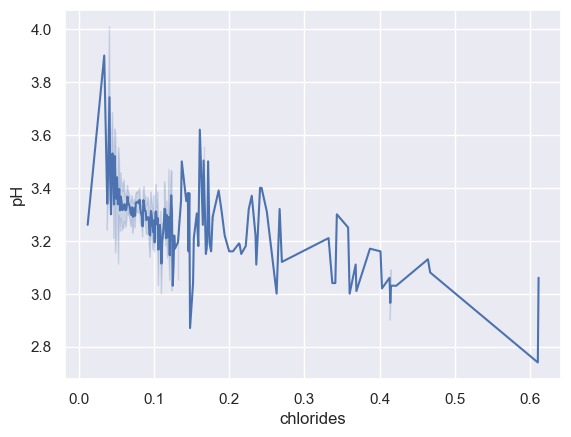

In [72]:
sns.lineplot(x='chlorides', y='pH', data=df)
plt.show()

Multivariate Analysis

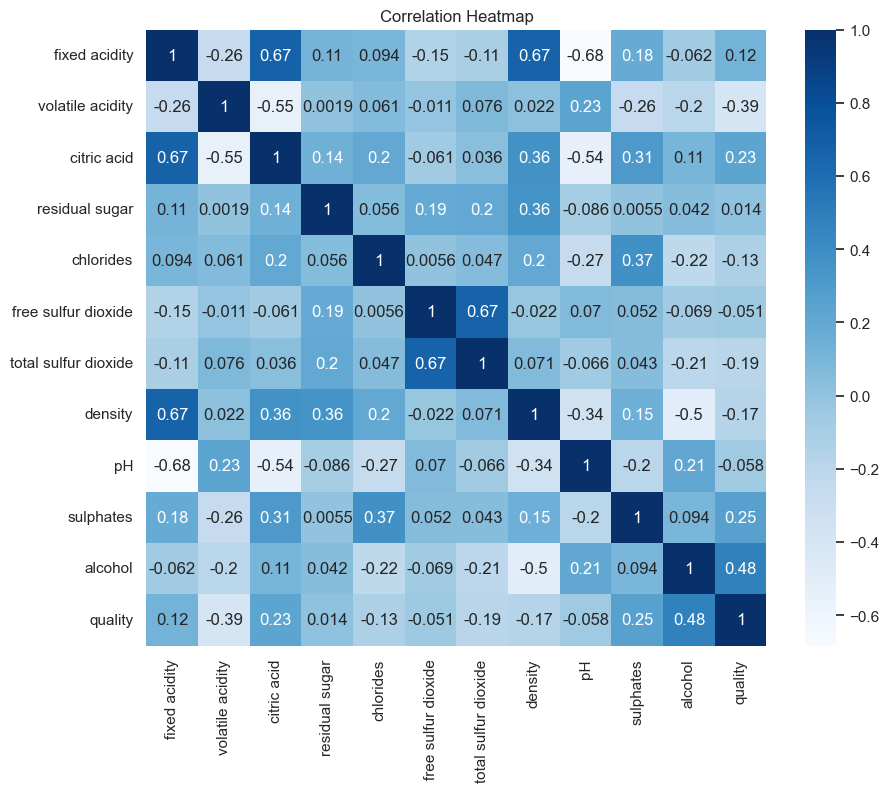

In [61]:
corr = df.corr()["quality"].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

Correlation with regard to the target vector

In [58]:
corr

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

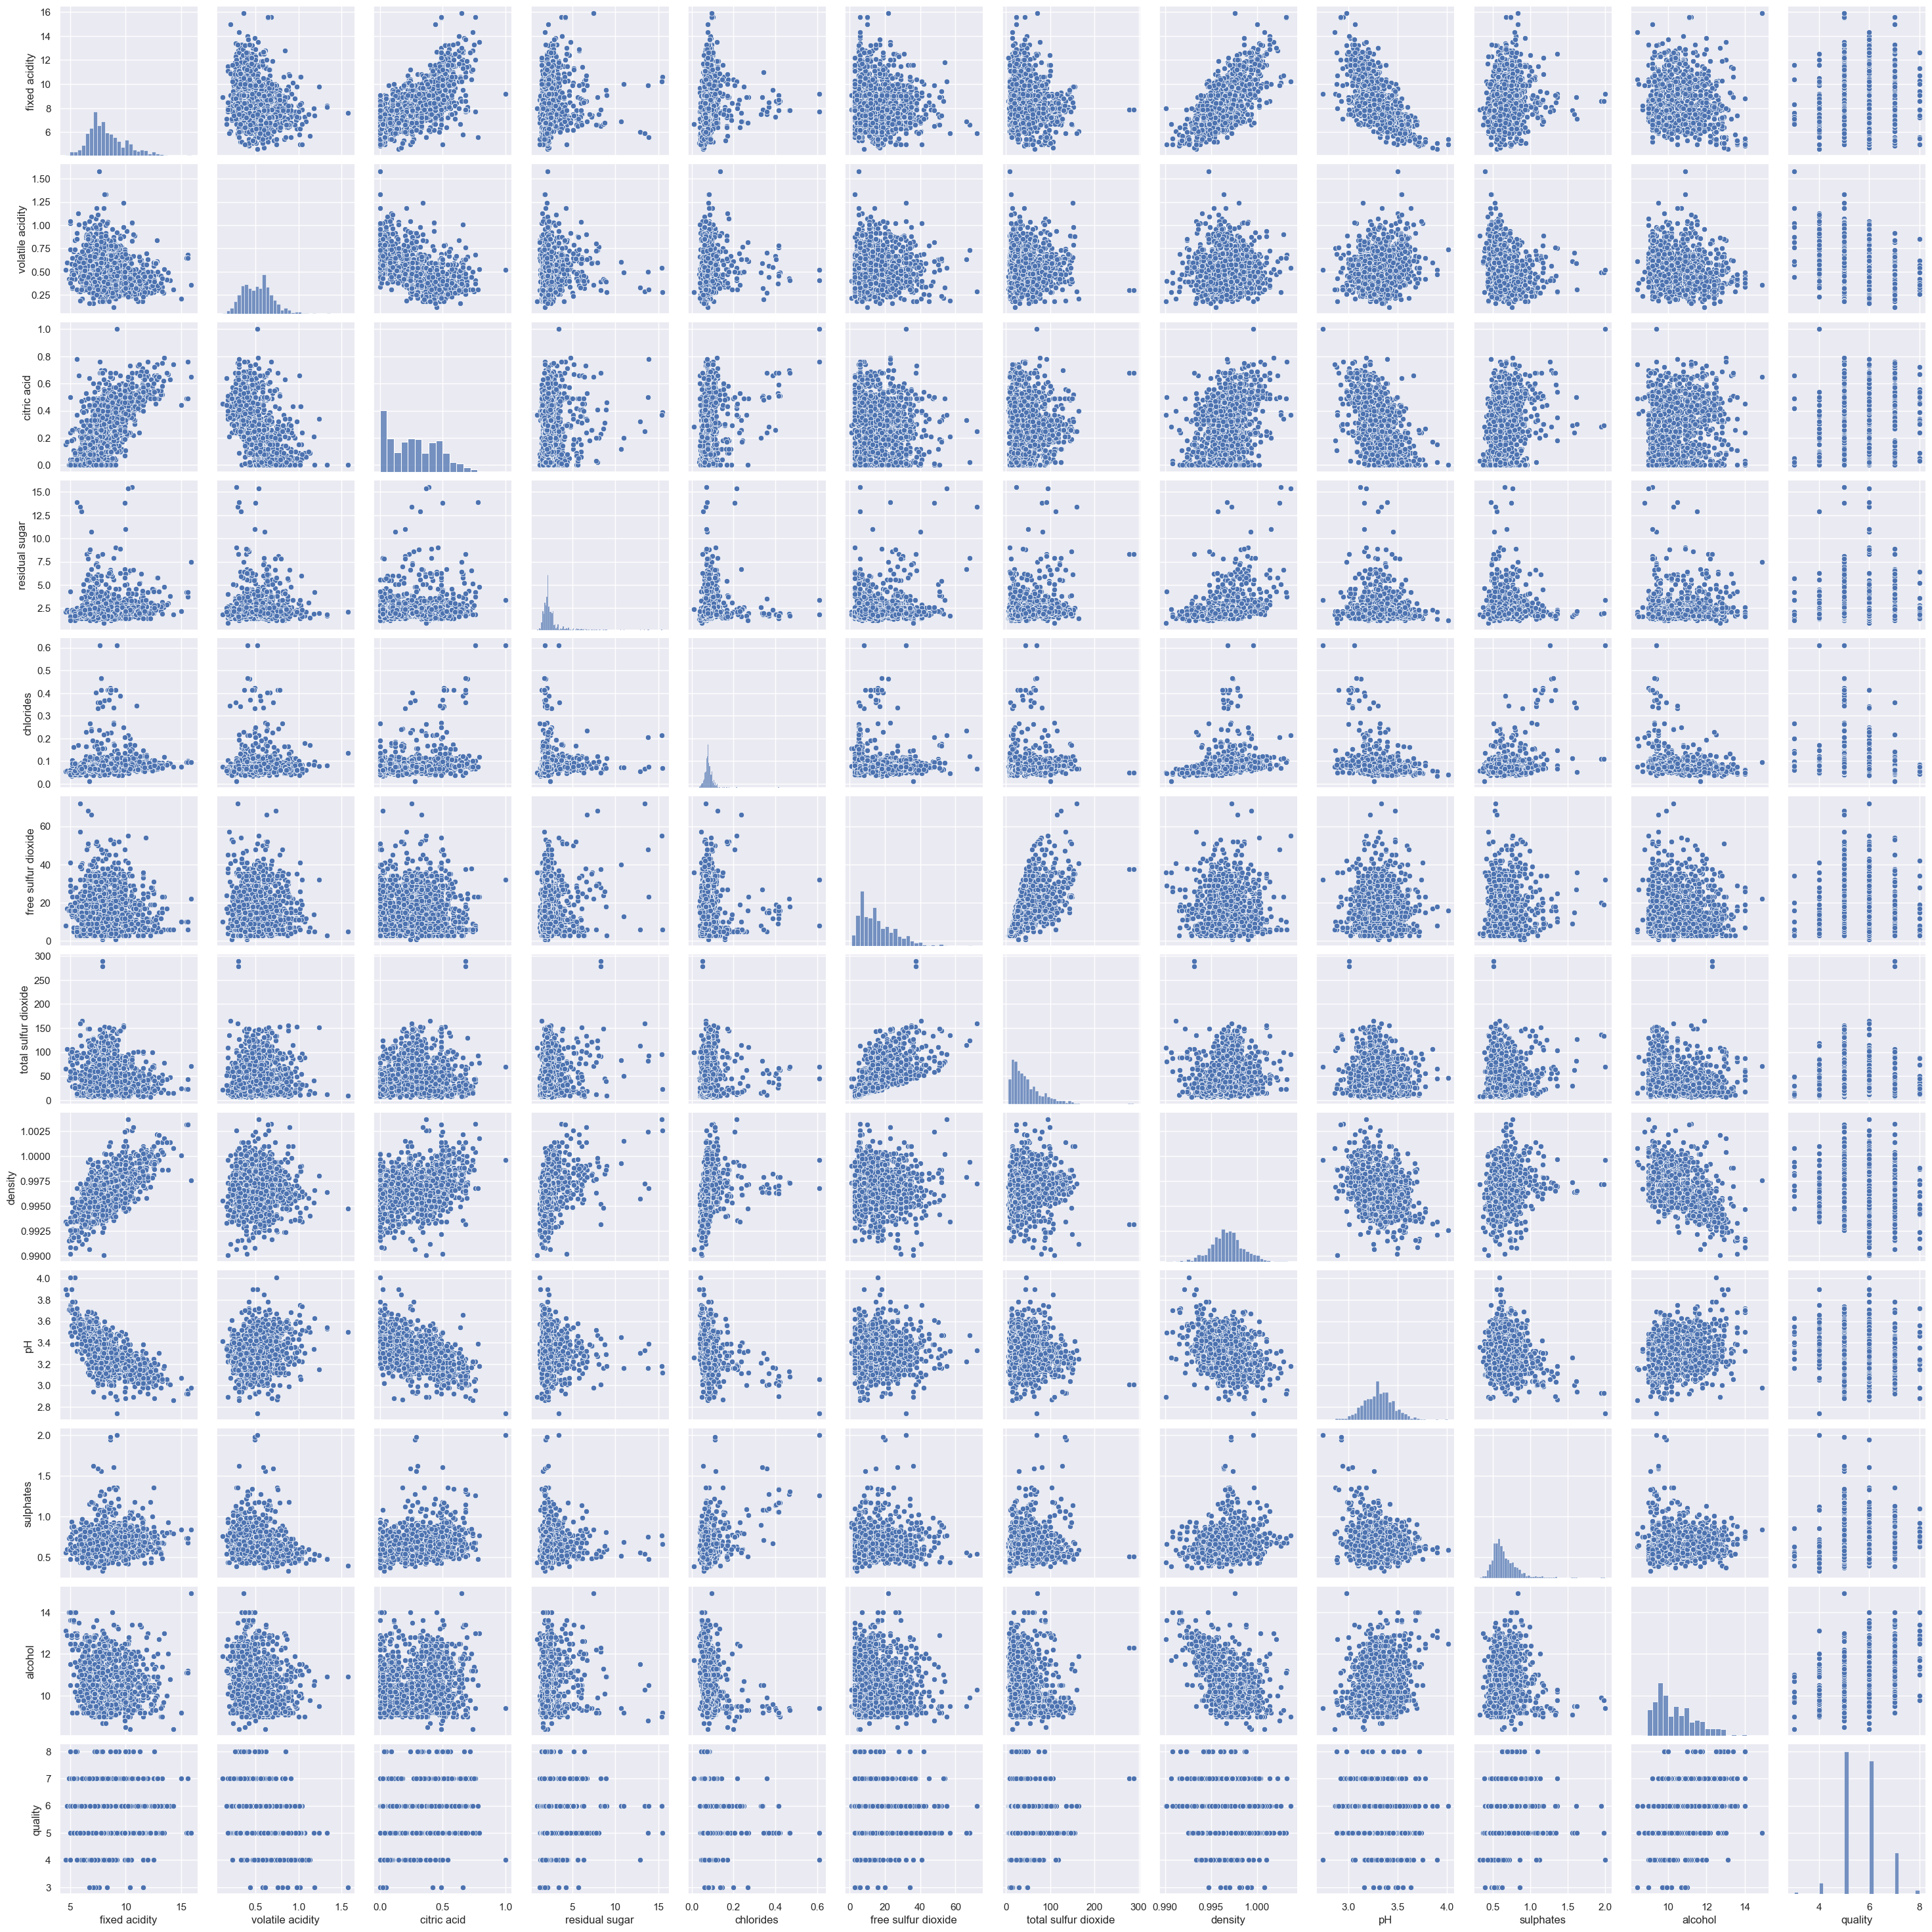

In [67]:
sns.pairplot(df)

Data pre-processing

In [73]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

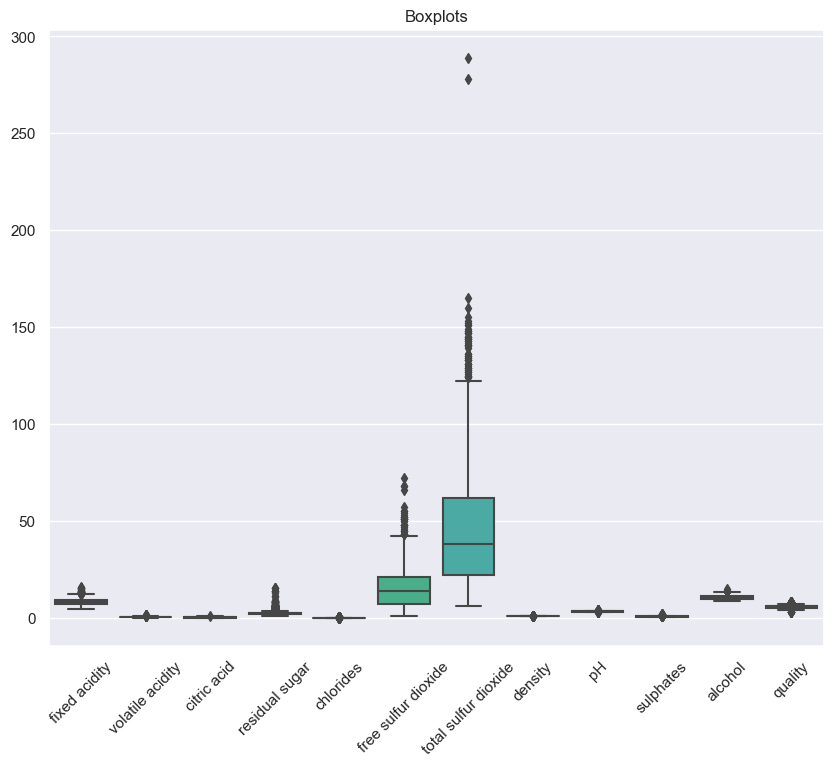

In [114]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplots');

In [115]:
l=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
for i in l:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upperL=q3+1.5*iqr
    lowerL=q1-1.5*iqr
    df[i]=np.where(df[i]>upperL,upperL,np.where(df[i]<lowerL,lowerL,df[i]))

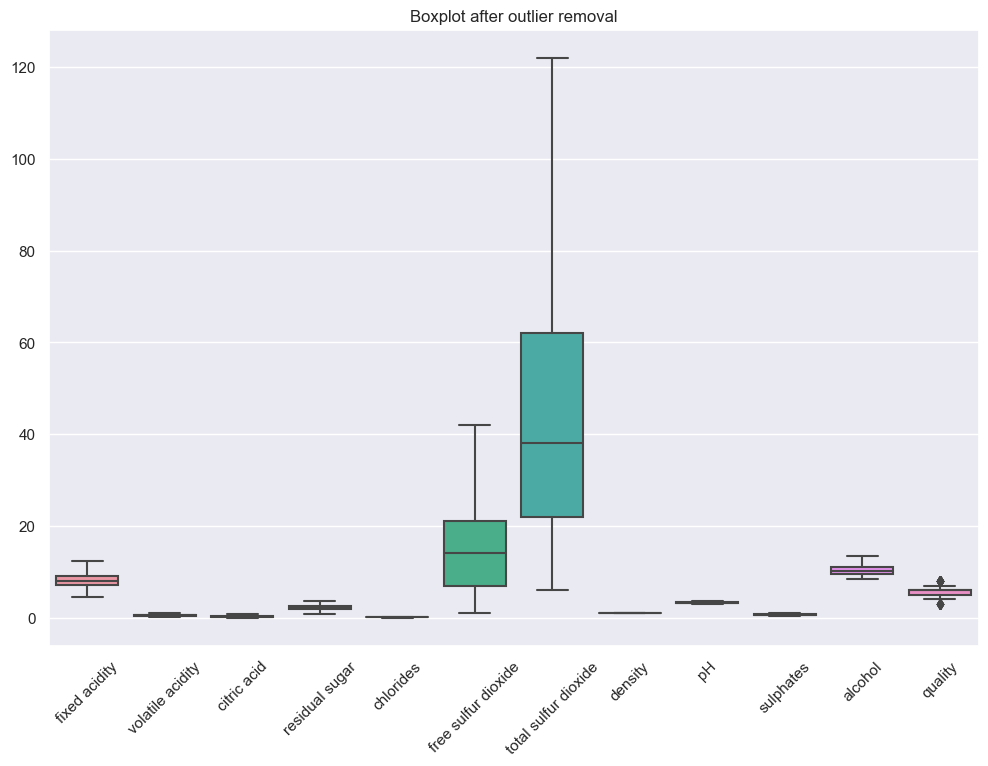

In [116]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplot after outlier removal')
plt.show()

Creating feature matrix and target vector

In [117]:
X = df.drop(columns=['quality'], axis=1)
y = df['quality']

In [118]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1599, 11)
Shape of y: (1599,)


Scaling and splitting data

In [125]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=10)

In [120]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


Model Building

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

logReg=LogisticRegression(max_iter=500)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
print(y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

[6 5 5 6 5 7 6 6 5 5 6 5 5 5 5 4 6 6 5 5 5 6 6 5 5 6 6 6 6 5 5 5 6 6 6 5 7
 5 6 5 6 6 5 6 5 6 5 6 6 5 6 7 6 7 6 7 6 5 5 5 6 5 7 6 5 5 6 6 5 6 6 5 6 5
 5 5 5 6 6 6 6 5 6 5 6 6 6 5 6 5 7 6 7 5 6 6 5 5 6 6 6 5 5 6 6 6 5 6 6 5 5
 6 5 5 5 5 5 5 6 6 6 5 6 5 6 5 5 5 5 5 5 5 4 6 5 7 6 5 5 6 6 6 5 6 5 6 6 5
 5 6 5 6 6 6 5 5 6 5 6 7 6 6 7 6 6 6 7 7 6 6 6 7 6 7 5 5 6 5 5 6 6 6 6 6 5
 5 6 7 5 5 5 5 6 6 5 6 5 6 7 6 6 6 6 5 5 5 6 5 5 7 5 6 6 5 6 5 6 5 5 5 6 7
 5 6 7 5 6 6 5 5 5 6 5 6 5 6 5 5 5 5 5 6 6 7 6 6 5 5 6 6 5 6 5 5 5 5 7 7 7
 6 6 5 6 5 6 6 5 7 6 5 5 6 6 6 5 5 5 5 6 5 6 6 6 6 6 5 6 6 5 6 6 5 7 6 5 6
 5 6 5 6 6 6 6 7 6 7 5 7 6 5 6 5 6 5 6 7 7 7 5 6 6 6 6 7 6 6 6 5 5 5 6 7 6
 7 5 5 5 5 5 5 6 5 6 7 5 5 7 5 5 6 5 5 6 5 5 6 6 6 6 5 5 6 6 6 5 5 6 6 6 6
 6 5 6 6 6 7 6 5 5 6 6 5 6 5 5 6 5 6 6 6 6 6 7 6 5 5 5 6 5 6 5 6 5 5 5 5 7
 6 6 6 6 5 5 5 5 6 5 6 7 7 6 5 6 5 5 6 5 6 5 6 6 5 6 6 5 7 6 6 6 5 5 6 5 5
 6 5 5 6 5 5 7 5 6 5 5 6 5 6 6 6 6 5 6 7 7 6 6 6 7 5 5 5 5 7 5 5 5 5 5 5]
              precision   

C:\Users\urwit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\urwit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\urwit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Model Evaluation

In [127]:
y_pred_train = logReg.predict(X_train)
print('Testing Accuracy for LogisticRegression = ', accuracy_score(y_test,y_pred))
print('Training Accuracy for LogisticRegression = ', accuracy_score(y_train,y_pred_train))

Testing Accuracy for LogisticRegression =  0.5541666666666667
Training Accuracy for LogisticRegression =  0.6184092940125112


In [128]:
print("classification report for Logistic regression Classifier ")
print(classification_report(y_test,y_pred))

classification report for Logistic regression Classifier 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        16
           5       0.67      0.67      0.67       210
           6       0.48      0.57      0.52       183
           7       0.42      0.34      0.38        58
           8       0.00      0.00      0.00        11

    accuracy                           0.55       480
   macro avg       0.26      0.27      0.26       480
weighted avg       0.53      0.55      0.54       480



C:\Users\urwit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\urwit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\urwit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Random testing 

In [129]:
predicting_sample = [[8.9,	0.38, 0.40,	 2.2,	0.068,	12.0,	28.0,	0.99486,	3.27,	0.75,	12.6],
					[8.1,	0.38, 0.28,	 2.1,	0.066,	13.0,	30.0,	0.99680,	3.23,	0.73,	9.7],
					[12.35,	0.300, 0.31, 1.80,	0.078,	18.0,	88.0,	0.99590,	3.44,	0.78,	12.3],
					[8.6,	0.42, 0.39,	 1.8,	0.068,	6.0	,	12.0,	0.99516,	3.35,	0.69,	11.7],
					[7.6,	0.420, 0.08, 2.7,	0.084,	15.0,	48.0,	0.99680,	3.21,	0.59,	10.0],
					[8.8,	0.600, 0.29, 2.2,	0.098,	5.0	,	15.0,	0.99880,	3.36,	0.49,	9.1]]

In [130]:
for i in predicting_sample:
    x=logReg.predict([i])
    print(x)

[5]
[5]
[5]
[7]
[5]
[7]


C:\Users\urwit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\urwit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\urwit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\urwit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\urwit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, 